<a href="https://colab.research.google.com/github/ZeinabMetwally/CodeAlpha-Task3-Handwritten-Character-Recognetion/blob/main/Handwritten_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
test_path='/content/drive/MyDrive/emnist-letters-test.csv'
train_path='/content/drive/MyDrive/emnist-letters-train.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

#read data


In [ ]:
train_set=pd.read_csv(train_path)
test_set=pd.read_csv(test_path)

In [ ]:
train_set.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88799 entries, 0 to 88798
Columns: 785 entries, 23 to 0.415
dtypes: int64(785)
memory usage: 531.8 MB


In [ ]:
print(f"Train set shape:  {train_set.shape}")
print(f"Test set shape:  {test_set.shape}")

Train set shape:  (88799, 785)
Test set shape:  (14799, 785)


In [ ]:
labels = train_set["23"].values

#split the data

In [ ]:
#train_set
y_train = np.array(train_set.iloc[:,0].values)
x_train = np.array(train_set.iloc[:,1:].values)
#test_set
y_test = np.array(test_set.iloc[:,0].values)
x_test = np.array(test_set.iloc[:,1:].values)
print(y_train.shape)
print(x_train.shape)

(88799,)
(88799, 784)


#show data

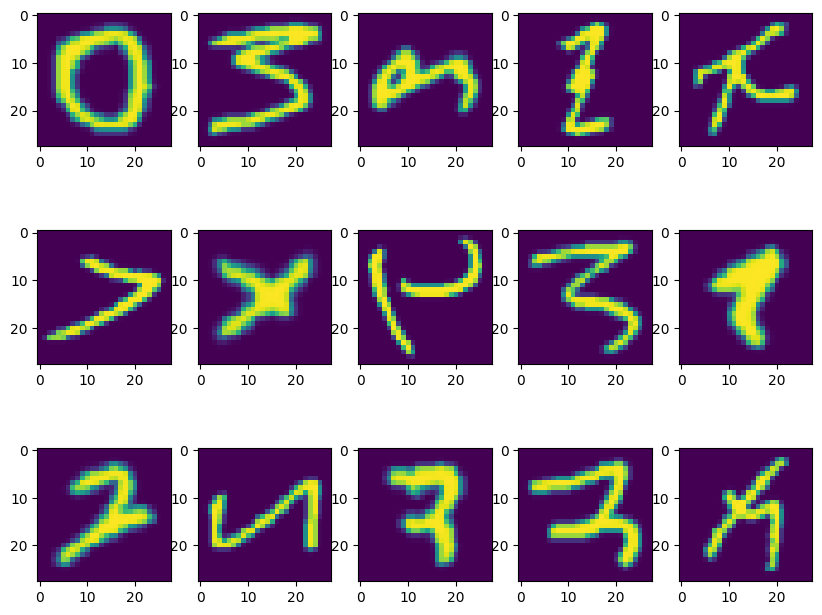

In [ ]:
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x_train[i+2].reshape([28,28]))

#preprocssing..Normalisation and reshaping of data

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [ ]:
# Transform labels
y_train = tf.keras.utils.to_categorical(y_train, 37)  # 37 classes (10 digits + 26 letters + 1 for unknown or garbage class)
y_test = tf.keras.utils.to_categorical(y_test, 37)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train ,test_size=0.2,random_state = 42)

#CNN For Classification

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(37,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 512)         0

In [ ]:
model.compile(optimizer="Adam",
             loss="categorical_crossentropy",
             metrics=(["accuracy"]))

In [ ]:
early_stopping_callback= EarlyStopping(monitor='val_accuracy',
                                       min_delta=0,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

In [ ]:
epochs = 15
batch_size = 100

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                   verbose=1,
                   callbacks=[early_stopping_callback])

Epoch 1/15
711/711 [==============================] - 185s 258ms/step - loss: 0.6461 - accuracy: 0.7977 - val_loss: 0.3323 - val_accuracy: 0.8914
Epoch 2/15
711/711 [==============================] - 163s 229ms/step - loss: 0.2556 - accuracy: 0.9147 - val_loss: 0.2301 - val_accuracy: 0.9205
Epoch 3/15
711/711 [==============================] - 168s 236ms/step - loss: 0.2037 - accuracy: 0.9294 - val_loss: 0.2050 - val_accuracy: 0.9291
Epoch 4/15
711/711 [==============================] - 162s 228ms/step - loss: 0.1768 - accuracy: 0.9380 - val_loss: 0.2034 - val_accuracy: 0.9285
Epoch 5/15
711/711 [==============================] - 159s 224ms/step - loss: 0.1541 - accuracy: 0.9450 - val_loss: 0.2086 - val_accuracy: 0.9299
Epoch 6/15
711/711 [==============================] - 162s 228ms/step - loss: 0.1385 - accuracy: 0.9487 - val_loss: 0.2042 - val_accuracy: 0.9316
Epoch 7/15
711/711 [==============================] - 161s 227ms/step - loss: 0.1236 - accuracy: 0.9525 - val_loss: 0.2031 -

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

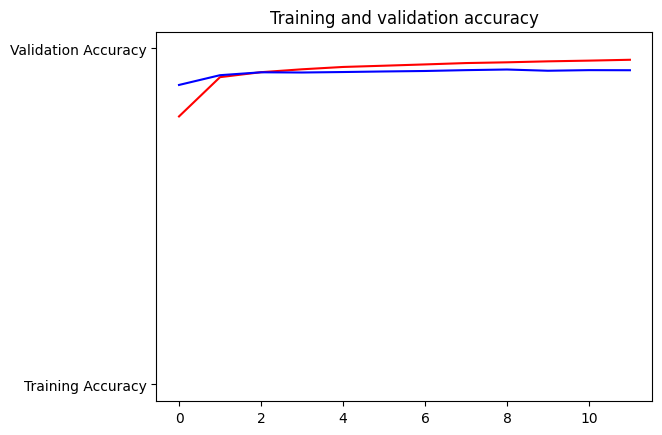

In [ ]:
# Plot training and validation accuracy per epoch


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

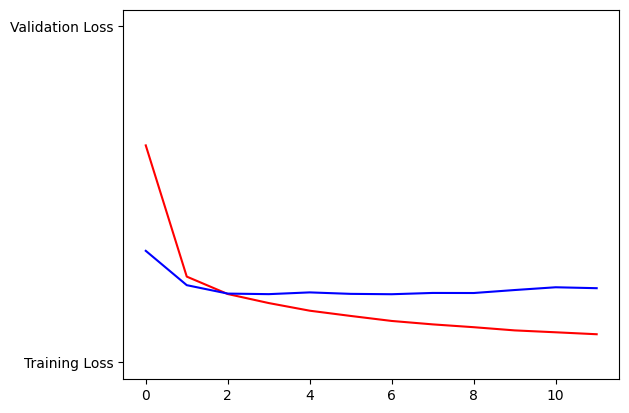

In [ ]:
# Plot training and validation loss per epoch


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()